## 1. Load libraries

In [1]:
from ucimlrepo import fetch_ucirepo  # Library to directly download datasets from UC Irvine Machine Learning Repo
import pandas as pd # Library to handle and manipulate data
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load datasets

In [2]:
# Covid 19 dataset
covid_19_surveillance = fetch_ucirepo(id=567) 
covid_19_X = covid_19_surveillance.data.features 
covid_19_y = covid_19_surveillance.data.targets 
# Hepatisis dataset
hepatitis = fetch_ucirepo(id=46)   
hepatitis_X = hepatitis.data.features 
hepatitis_y = hepatitis.data.targets 
# Chronic kidney disease dataset
chronic_kidney_disease = fetch_ucirepo(id=336) 
chronic_kidney_disease_X = chronic_kidney_disease.data.features 
chronic_kidney_disease_y = chronic_kidney_disease.data.targets 
# Breast cancer dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
breast_cancer_X = breast_cancer_wisconsin_diagnostic.data.features 
breast_cancer_y = breast_cancer_wisconsin_diagnostic.data.targets 
# Cryotherapy dataset   
Cryotherapy = pd.read_excel("Cryotherapy.xlsx")
cryotherapy_X = Cryotherapy.drop(columns=['Result_of_Treatment'])
cryotherapy_y = Cryotherapy.Result_of_Treatment
# Immunotherapy dataset
Immunotherapy = pd.read_excel("Immunotherapy.xlsx")
immunotherapy_X = Immunotherapy.drop(columns=['Result_of_Treatment'])
immunotherapy_y = Immunotherapy.Result_of_Treatment

## 3. Data Cleaning and EDA

### 3.1. Covid 19 Dataset

In [3]:
# Replace '+' with 1 and '-' with 0 in each column
covid_19_X = covid_19_X.replace({'+': 1, '-': 0})
# Convert columns to numeric
covid_19_X = covid_19_X.apply(pd.to_numeric)
# Summary statistics
covid_19_X.describe()

,A01,A02,A03,A04,A05,A06,A07
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.714286,0.714286,0.285714,0.642857,0.285714,0.285714,0.357143
std,0.468807,0.468807,0.468807,0.497245,0.468807,0.468807,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.750000,1.000000,0.750000,0.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


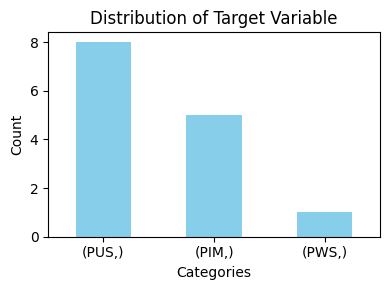

In [4]:
# Plot the target variable distribution
plt.figure(figsize=(4, 3))
covid_19_y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

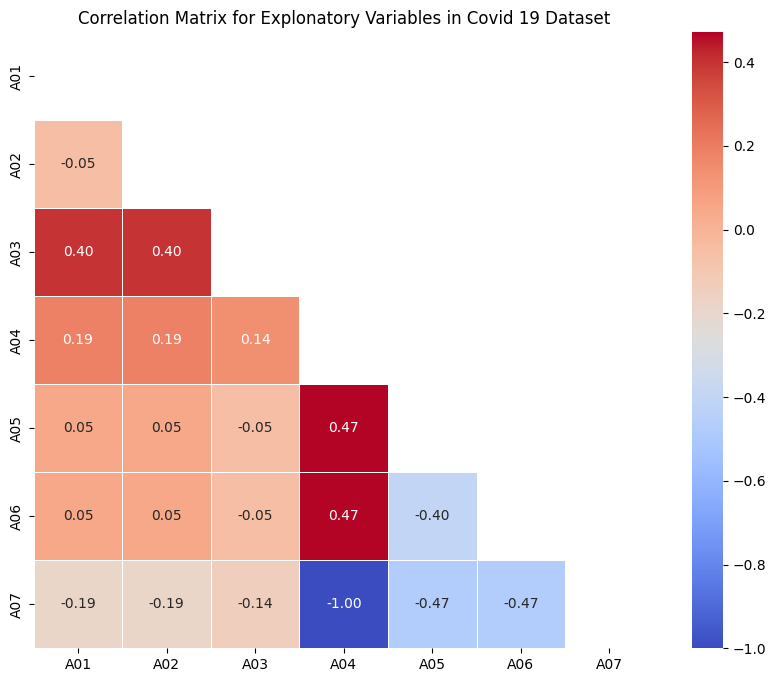

In [5]:
# Calculate correlation matrix for explanatory variables 
covid_19_corr_matrix = covid_19_X.corr()
# Create a mask to hide the upper triangle
covid_19_corr_matrix_mask = np.triu(np.ones_like(covid_19_corr_matrix, dtype=bool))
# Plot correlation matrix showing only the lower triangle
plt.figure(figsize=(10, 8))
sns.heatmap(covid_19_corr_matrix, mask=covid_19_corr_matrix_mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Explonatory Variables in Covid 19 Dataset')
plt.show()


### 3.2. Hepatitis Dataset

In [6]:
hepatitis_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
Sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
Steroid,154.0,1.506494,0.501589,1.0,1.00,2.0,2.00,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
Fatigue,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
Malaise,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
Anorexia,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
Liver Big,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
Liver Firm,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0
Spleen Palpable,150.0,1.800000,0.401340,1.0,2.00,2.0,2.00,2.0


In [7]:
# List of columns to apply binary remapping
columns_to_process = ['Steroid', 'Sex', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 
                      'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
for col in columns_to_process:
    if col == 'Sex':
        hepatitis_X['is_female'] = hepatitis_X[col] - 1
    else:
        # Apply the binary remapping: convert to binary and rename the column
        hepatitis_X[f'is_{col.lower()}'] = hepatitis_X[col] - 1
    # Drop the original column
    hepatitis_X.drop(columns=[col], inplace=True)

# Also apply binary remapping to target column
hepatitis_y['is_alive'] = hepatitis_y['Class'] - 1
hepatitis_y.drop(columns=['Class'], inplace=True)

# Check dataset
hepatitis_X.head()

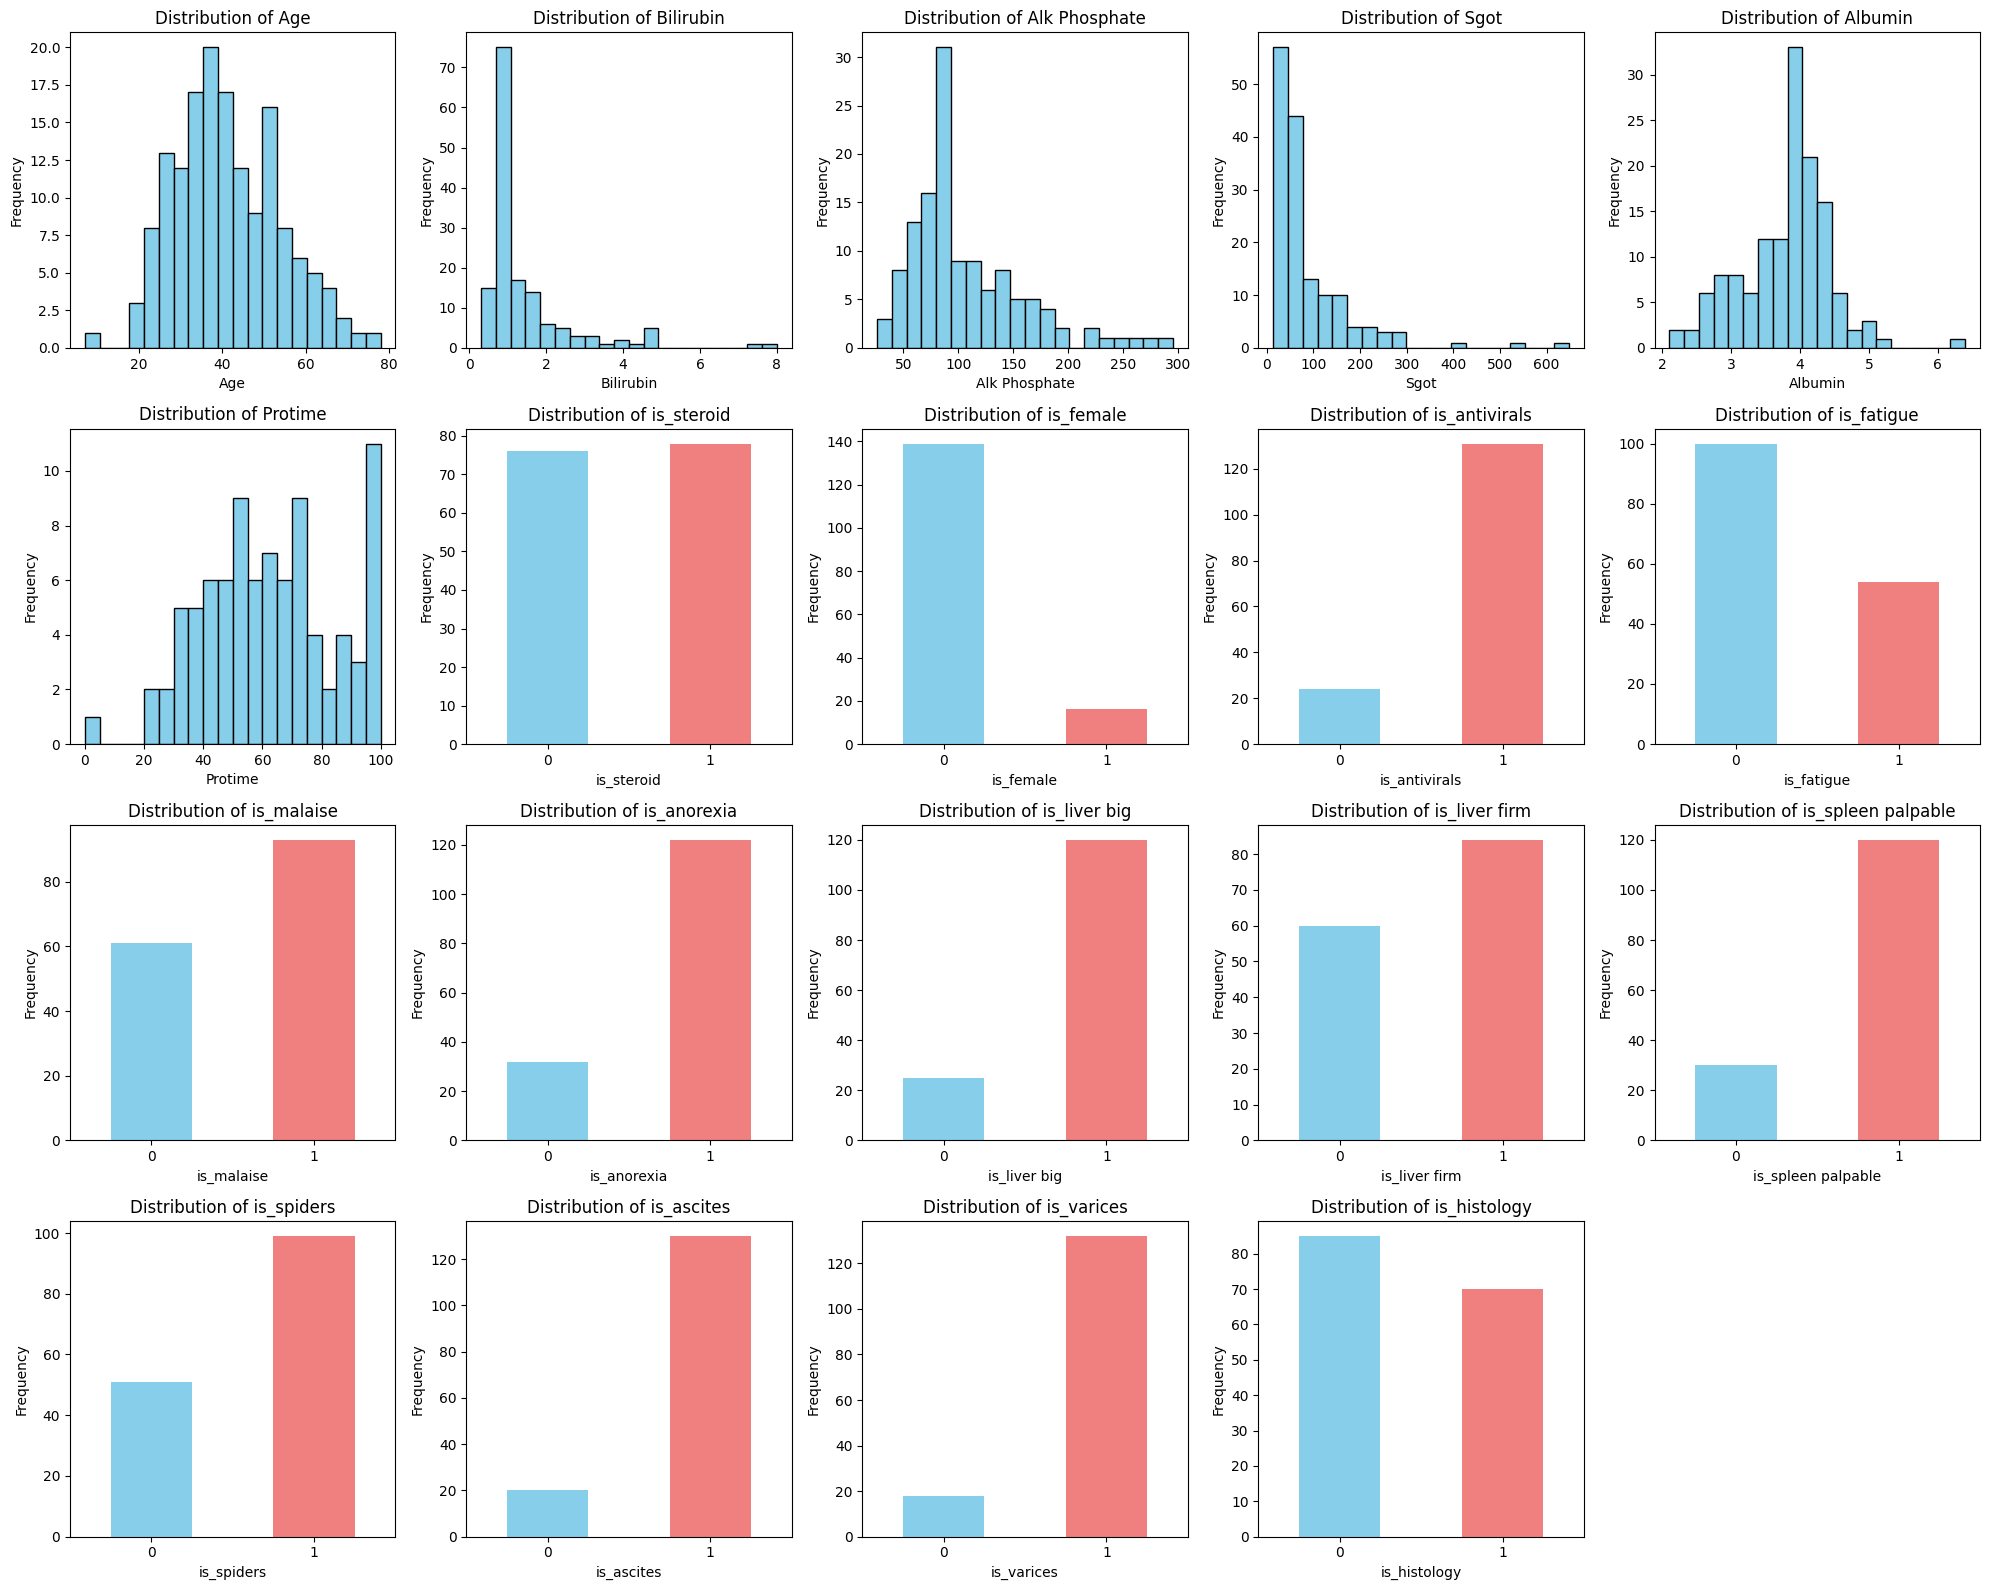

In [10]:
# Get the binary columns starting with "is_"
binary_columns = [col for col in hepatitis_X.columns if col.startswith('is_')]

# Set up the figure and axes
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

# Iterate over each column and plot its distribution
for i, col in enumerate(hepatitis_X.columns):
    if col in binary_columns:
        # Count the frequency of each category
        counts = hepatitis_X[col].value_counts().sort_index()
        # Plot the bars next to each other
        counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'lightcoral'])
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_ylabel('Frequency')
        # Force the x ticks to be integers
        axs[i].set_xticks(range(len(counts)))
        axs[i].set_xticklabels(counts.index.astype(int), rotation=0)  # Set x tick labels as integers
    else:
        # Plot the histogram for non-binary columns
        axs[i].hist(hepatitis_X[col], bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frequency')

# Hide any empty subplots
for ax in axs[len(hepatitis_X.columns):]:
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

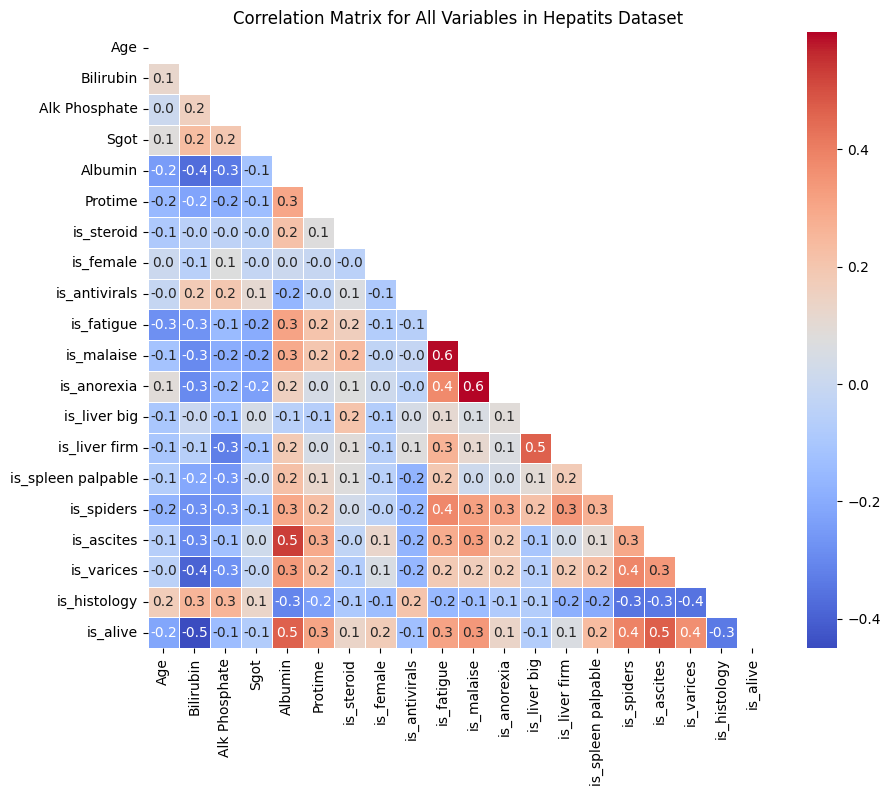

In [37]:
# Calculate correlation matrix for explanatory variables 
hepatitis_corr_matrix = pd.concat([hepatitis_X,hepatitis_y], axis = 1).corr()
# Create a mask to hide the upper triangle
hepatitis_corr_matrix_mask = np.triu(np.ones_like(hepatitis_corr_matrix, dtype=bool))
# Plot correlation matrix showing only the lower triangle
plt.figure(figsize=(10, 8))
sns.heatmap(hepatitis_corr_matrix, mask=hepatitis_corr_matrix_mask, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix for All Variables in Hepatits Dataset')
plt.show()

In [ ]:
# Define a function to check if a row is complete (contains no missing values)
def is_complete(row):
    return row.notnull().all()

# Filter the hepatitis_X DataFrame to keep only complete records (rows)
complete_records = hepatitis_X[hepatitis_X.apply(is_complete, axis=1)]

# Calculate the median and mean of each column in hepatitis_X
column_medians = hepatitis_X.median()
column_means = hepatitis_X.mean().round()

# Create a copy of hepatitis_X for mean imputation
hepatitis_X_mean_imputted = hepatitis_X.copy()
# Fill missing values in the copy with column means
hepatitis_X_mean_imputted = hepatitis_X_mean_imputted.fillna(column_means)

# Create a copy of hepatitis_X for median imputation
hepatitis_X_median_imputted = hepatitis_X.copy()
# Fill missing values in the copy with column medians
hepatitis_X_median_imputted = hepatitis_X_median_imputted.fillna(column_medians)

# Create a copy of hepatitis_X for missing data dropping
hepatitis_X_missing_dropped = hepatitis_X.copy()
# Filter the copy to keep only complete records (rows)
hepatitis_X_missing_dropped = hepatitis_X_missing_dropped[hepatitis_X.apply(is_complete, axis=1)]

# Create a copy of hepatitis_y for missing data dropping
hepatitis_y_missing_dropped = hepatitis_y.copy()
# Filter hepatitis_y to keep only complete records (rows) based on hepatitis_X's completeness
hepatitis_y_missing_dropped = hepatitis_y_missing_dropped[hepatitis_X.apply(is_complete, axis=1)]